In [ ]:
!pip install gdown

import os
import gdown
import zipfile
import logging
from genericpath import isdir

def download_data(url, filename, dir_name: str = "data") -> None:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    os.chdir(dir_name)
    logging.info("Downloading data....")
    gdown.download(
        url, quiet=False
    )
    logging.info("Extracting zip file....")
    with zipfile.ZipFile(f"{filename}.zip", 'r') as zip_ref:
        zip_ref.extractall(filename)
    os.remove(f"{filename}.zip")
    os.chdir("..")

download_data(url="https://drive.google.com/uc?&id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj",
              filename="ristek-datathon-2024",
              dir_name="datathon-2024")


Downloading...
From (original): https://drive.google.com/uc?&id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj
From (redirected): https://drive.google.com/uc?id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj&confirm=t&uuid=d1cded8d-2eaf-4eb4-8b2d-b7b000947b25
To: /content/datathon-2024/ristek-datathon-2024.zip
100%|██████████| 113M/113M [00:00<00:00, 155MB/s] 


In [ ]:
!pip install Sastrawi
!pip install fuzzywuzzy python-Levenshtein
!pip install indonlp
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer
# import nltk
# import string
# import re
# from collections import Counter
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# #import emoji
# from sklearn.utils import resample
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
# from sklearn.metrics import balanced_accuracy_score
# from sklearn.preprocessing import LabelEncoder
# from torch.utils.data import DataLoader
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
# from sklearn.utils.class_weight import compute_class_weight



# TRAIN

In [ ]:
df  = pd.read_csv("/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/train.csv")
df.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,0.976923,1.0,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,0.985634,1.0,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,0.951782,1.0,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,0.866667,0.0,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0


# Logistic Regression with Ridge regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, average_precision_score
from sklearn.utils import resample

# Load dataset
# train_df = pd.read_csv('train.csv')

# Separate features and target
X = df.drop(columns=['user_id', 'label'])
y = df['label']

# Calculate the number of subsets
minority_class_size = y.value_counts()[1]  # Number of fraud cases
desired_subset_size = minority_class_size * 2  # Size of each balanced subset
n_subsets = len(y) // desired_subset_size  # Number of subsets




In [ ]:
print(minority_class_size)
print(desired_subset_size)
print(n_subsets)

10857
21714
39


In [ ]:
# Function to create balanced datasets
def create_balanced_datasets(X, y, n_subsets):
    balanced_datasets = []
    for _ in range(n_subsets):
        X_majority = X[y == 0]
        X_minority = X[y == 1]
        y_majority = y[y == 0]
        y_minority = y[y == 1]

        X_majority_downsampled, y_majority_downsampled = resample(X_majority, y_majority,
                                                                  replace=False,
                                                                  n_samples=len(y_minority))
        X_balanced = pd.concat([X_majority_downsampled, X_minority])
        y_balanced = pd.concat([y_majority_downsampled, y_minority])

        balanced_datasets.append((X_balanced, y_balanced))
    return balanced_datasets

# Create balanced datasets
balanced_datasets = create_balanced_datasets(X, y, n_subsets) ##dalam bentuk list

In [ ]:
# Train Ridge regression models on balanced datasets
coefficients = []
for X_balanced, y_balanced in balanced_datasets:
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_balanced, y_balanced)
    coefficients.append(ridge.coef_)

# Aggregate and stabilize variable importance scores
coefficients = np.array(coefficients)
mean_coefficients = np.mean(coefficients, axis=0)



In [ ]:
print(mean_coefficients)

[ 0.06363977  0.01624742 -0.17928719  0.14860298  0.19875188  0.00163909
 -0.06493537 -0.05069234  0.04547801 -0.19945557  0.0083495  -0.22416028
  0.17404717 -0.03601666  0.00258534 -0.43451301  0.34854441]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load dataset
# train_df = pd.read_csv('train.csv')

# Separate features and target
X = df.drop(columns=['user_id', 'label'])
y = df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the number of subsets
minority_class_size = y.value_counts()[1]  # Number of fraud cases
desired_subset_size = minority_class_size * 2  # Size of each balanced subset
n_subsets = len(y) // desired_subset_size  # Number of subsets

# Function to create balanced datasets
def create_balanced_datasets(X, y, n_subsets):
    balanced_datasets = []
    for _ in range(n_subsets):
        X_majority = X[y == 0]
        X_minority = X[y == 1]
        y_majority = y[y == 0]
        y_minority = y[y == 1]

        X_majority_downsampled, y_majority_downsampled = resample(X_majority, y_majority,
                                                                  replace=False,
                                                                  n_samples=len(y_minority))
        X_balanced = np.vstack((X_majority_downsampled, X_minority))
        y_balanced = np.hstack((y_majority_downsampled, y_minority))

        balanced_datasets.append((X_balanced, y_balanced))
    return balanced_datasets

# Create balanced datasets
balanced_datasets = create_balanced_datasets(X_scaled, y, n_subsets)

# Train Ridge regression models on balanced datasets
coefficients = []
for X_balanced, y_balanced in balanced_datasets:
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_balanced, y_balanced)
    coefficients.append(ridge.coef_)

# Aggregate and stabilize variable importance scores
coefficients = np.array(coefficients)
mean_coefficients = np.mean(coefficients, axis=0)

# Select important features based on stabilized scores
selected_features = np.where(mean_coefficients > np.percentile(mean_coefficients, 95))[0]

# Train final logistic regression model with selected features
X_selected = X_scaled[:, selected_features]
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Grid Search for Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500, 1000]  # Increase max_iter
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='average_precision', cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate model
y_pred = best_model.predict(X_val)
y_prob = best_model.predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)
pr_auc = auc(recall, precision)

print(classification_report(y_val, y_pred))
print(f'Average Precision Score: {average_precision_score(y_val, y_prob)}')
print(f'Precision-Recall AUC: {pr_auc}')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    169404
           1       0.00      0.00      0.00      2176

    accuracy                           0.99    171580
   macro avg       0.49      0.50      0.50    171580
weighted avg       0.97      0.99      0.98    171580

Average Precision Score: 0.02173573156503761
Precision-Recall AUC: 0.33806771257208873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assuming you have loaded and preprocessed the test dataset similar to the training dataset

# Load test dataset
test_df = pd.read_csv('/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/test.csv')

# Drop 'user_id' column
test_X = test_df.drop(columns=['user_id'])

# Standardize the features using the same scaler from training data
test_X_scaled = scaler.transform(test_X)

# Select the same features as selected_features
test_X_selected = test_X_scaled[:, selected_features]

# Predict probabilities and labels
test_y_prob = best_model.predict_proba(test_X_selected)[:, 1]
test_y_pred = best_model.predict(test_X_selected)

# Optionally, you can save the predictions to a CSV file
test_predictions_df = pd.DataFrame({
    'user_id': test_df['user_id'],
    'predicted_probability': test_y_prob,
    'predicted_label': test_y_pred
})

test_predictions_df.to_csv('test_predictions.csv', index=False)

# Display predictions summary
print(test_predictions_df.head())

# If you need more detailed evaluation metrics or analysis, you can perform further steps accordingly.


   user_id  predicted_probability  predicted_label
0        4               0.023998                0
1       13               0.009515                0
2       37               0.006168                0
3       61               0.007058                0
4       66               0.006189                0


In [ ]:
df[df['label'] == 1]

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
252,1080,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
305,1307,1.0,1.0,0.295,0.285,0.966102,0.5,0.346,0.057,0.344,0.994220,0.0,0.033898,0.005780,0.087719,1.00,-1.000000,-1.00,1
481,2001,0.0,1.0,0.490,0.455,0.928571,0.4,1.046,0.126,1.036,0.990440,1.0,0.071429,0.009560,0.043956,0.75,0.010204,0.25,1
482,2002,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
515,2129,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857668,3699581,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
857678,3699636,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
857691,3699702,1.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
857775,3700044,1.0,6.0,0.590,0.575,0.974576,0.5,1.668,0.087,1.665,0.998201,0.0,0.025424,0.001799,0.043478,1.00,-1.000000,-1.00,1


In [ ]:
test_df[(test_df['pc0']== 1) & (test_df['pc2']==-1) & (test_df['pc3']==-1) & (test_df['pc4']==-1) & (test_df['pc5']==-1) & (test_df['pc6']==-1) & (test_df['pc7']==-1) & (test_df['pc8']==-1) & (test_df['pc9']==-1) & (test_df['pc10']== 0
) & (test_df['pc11']==-1) & (test_df['pc12']==-1) & (test_df['pc13']==-1) & (test_df['pc14']==-1) & (test_df['pc15']==-1) & (test_df['pc16']==-1)]

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17,224,1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
34,377,1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
42,454,1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
43,456,1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367677,3700278,1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
367686,3700335,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
367689,3700390,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
367694,3700483,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
test_predictions_df[test_predictions_df['predicted_probability'] >= 0.3].shape[0]

0

In [ ]:
# Select important features based on stabilized scores
selected_features = np.where(mean_coefficients > np.percentile(mean_coefficients, 95))[0]

# Train final logistic regression model with selected features
X_selected = X.iloc[:, selected_features]
final_model = LogisticRegression()
final_model.fit(X_selected, y)

from sklearn.model_selection import train_test_split, GridSearchCV

#Grid Search for Hyperparameter Tuning
# Grid Search for Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500, 1000]  # Increase max_iter
}

id_search = GridSearchCV(LogisticRegression(), param_grid, scoring='average_precision', cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# # Evaluate model
# X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# y_pred = final_model.predict(X_val)
# print(classification_report(y_val, y_pred))
# print(f'Average Precision Score: {average_precision_score(y_val, y_pred)}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve, auc

# Evaluate model
y_pred = best_model.predict(X_val)
y_prob = best_model.predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)
pr_auc = auc(recall, precision)

print(classification_report(y_val, y_pred))
print(f'Average Precision Score: {average_precision_score(y_val, y_prob)}')
print(f'Precision-Recall AUC: {pr_auc}')

# Logistic Regression

In [ ]:
df  = pd.read_csv("/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/train.csv")
df.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,0.976923,1.0,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,0.985634,1.0,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,0.951782,1.0,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,0.866667,0.0,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0


In [ ]:
loan_activities = pd.read_csv('/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/loan_activities.csv')
loan_activities.head()

,user_id,reference_contact,loan_type,ts
0,2223129,903716,1,671
1,1380939,484583,1,89
2,2724411,1185034,1,230
3,2401751,1369254,1,120
4,1982168,21797,1,57


In [ ]:
loan_activities.shape[0]

4300999

In [ ]:
# prompt: check duplicate

loan_activities['user_id'].duplicated().sum()


2110337

In [ ]:
# Menghitung frekuensi kemunculan setiap 'user_id'
user_id_counts = loan_activities['user_id'].value_counts()

# Membuat DataFrame baru dari hasil perhitungan
freq = pd.DataFrame({'user_id': user_id_counts.index, 'frekuensi': user_id_counts.values})


In [ ]:
freq.head()

,user_id,frekuensi
0,3563530,6
1,1988848,6
2,1161522,6
3,1179599,6
4,1118722,6


In [ ]:
# Menggabungkan dataset berdasarkan kolom "id"
merged_data = df.merge(freq, on='user_id', how='left')
merged_data

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label,frekuensi
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,0.976923,1.0,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0,NaN
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,0.985634,1.0,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0,2.0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,0.951782,1.0,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0,3.0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,2.0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,0.866667,0.0,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857894,3700529,1.0,4.0,0.190,0.160,0.842105,0.1,0.281,0.005,0.274,0.975089,0.0,0.157895,0.024911,0.031250,1.000000,-1.000000,-1.000000,0,1.0
857895,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,0.989867,4.0,0.102339,0.010133,0.068404,0.857143,0.011696,0.190476,0,3.0
857896,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,0.987799,2.0,0.048499,0.012201,0.058252,0.458333,0.004619,0.083333,0,1.0
857897,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,0.968408,4.0,0.245783,0.031592,0.060703,0.736842,0.009639,0.210526,0,1.0


In [ ]:
## Mengganti Nan pada Frekuensi menjadi 0
merged_data = merged_data.fillna(0)


In [ ]:
df = merged_data

In [ ]:
#separating the data for analysis
df_fraud = df[df['label'] == 1]
df_non_fraud = df[df['label'] == 0]

In [ ]:
df.groupby('label').mean()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
label,,,,,,,,,,,,,,,,,,
0,1.851083e+06,0.746346,3.706804,0.558243,0.402963,0.181864,0.325565,0.979006,-0.239828,0.932846,0.258683,1.345989,-0.278029,-0.354848,-0.347332,0.037133,-0.552359,-0.437668
1,1.863080e+06,0.787787,3.884498,-0.459439,-0.485601,-0.355211,-0.481173,-0.409667,-0.661239,-0.417288,-0.325537,0.556876,-0.652158,-0.681832,-0.664929,-0.475042,-0.778923,-0.698378


In [ ]:
s1 = df.drop(columns = ['user_id']).mode()
s1

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [ ]:
#statistical measures of the data
s1 = df_fraud.drop(columns = ['user_id']).mode()
s1

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1


In [ ]:
s1 = df_non_fraud.drop(columns = ['user_id']).mode()
s1

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [ ]:
df_fraud.shape[0]

10857

Handle the imbalanced data

In [ ]:
# build a sample dataset with similar distribution of fraud and non-fraud
df_non_fraud_sample = df_non_fraud.sample(n=df_fraud.shape[0], random_state=42)

In [ ]:
new_df = pd.concat([df_fraud, df_non_fraud_sample], axis = 0)

In [ ]:
new_df.groupby('label').mean()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
label,,,,,,,,,,,,,,,,,,
0,1.844080e+06,0.748549,3.669430,0.572835,0.419409,0.202665,0.339422,0.984813,-0.231529,0.938758,0.280091,1.335452,-0.266218,-0.343644,-0.336126,0.055792,-0.544391,-0.425486
1,1.863080e+06,0.787787,3.884498,-0.459439,-0.485601,-0.355211,-0.481173,-0.409667,-0.661239,-0.417288,-0.325537,0.556876,-0.652158,-0.681832,-0.664929,-0.475042,-0.778923,-0.698378


Splitting the data into features and target

In [ ]:
X = new_df.drop(columns=['user_id', 'label'], axis = 1)
y = new_df['label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(21714, 18) (17371, 18) (4343, 18)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = LogisticRegression()

# Define the parameters grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear', 'saga']       # Solver type
}

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy with best model: {:.4f}'.format(test_accuracy))


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.67
Test set accuracy with best model: 0.6827


In [ ]:
from sklearn.metrics import classification_report, average_precision_score

AP_score = average_precision_score(y_test, y_pred)
print('Average Precision with best model: {:.4f}'.format(AP_score))

Average Precision with best model: 0.6185


In [ ]:
# Assuming test_df is your new dataset DataFrame

# Ensure test_df has the same columns as the training data except for 'user_id' and 'label'
X_new = test_df.drop(columns=['user_id'], axis=1)

# Scale the new data using the same scaler
X_new_scaled = scaler.transform(X_new)

# Make predictions on the new data
new_predictions = best_model.predict(X_new_scaled)

In [ ]:
# Create a DataFrame with 'user_id' and 'label'
prediction_df = pd.DataFrame({
    'user_id': test_df['user_id'],
    'label': new_predictions
})

# Save the predictions to a CSV file
prediction_df.to_csv('new_predictions.csv', index=False)


In [ ]:
# Train the model on PCA-transformed data
model = LogisticRegression(solver='liblinear')
model.fit(X_train_pca, y_train)

# Evaluate the model
X_test_prediction = model.predict(X_test_pca)
training_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Test Data Accuracy (with PCA):', training_data_accuracy)

Test Data Accuracy (with PCA): 0.6744186046511628


In [ ]:
model = LogisticRegression(solver='liblinear')


In [ ]:
#training the model
model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
X_train_prediction = model.predict(X_test_scaled)
training_data_accuracy = accuracy_score(X_train_prediction, y_test)

In [ ]:
print('accuracy: ', training_data_accuracy)

accuracy:  0.6817867833294957


In [ ]:
print('accuracy: ', training_data_accuracy)

accuracy:  0.6827078056642873


In [ ]:
# Assuming test_df is your new dataset DataFrame

# Ensure test_df has the same columns as the training data except for 'user_id' and 'label'
X_new = test_df.drop(columns=['user_id'], axis=1)

# Scale the new data using the same scaler
X_new_scaled = scaler.transform(X_new)

# Make predictions on the new data
new_predictions = model.predict(X_new_scaled)

In [ ]:
# Create a DataFrame with 'user_id' and 'label'
prediction_df = pd.DataFrame({
    'user_id': test_df['user_id'],
    'label': new_predictions
})

# Save the predictions to a CSV file
prediction_df.to_csv('new_predictions.csv', index=False)


# LightGBM Model

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['user_id', 'label'])
y = df['label']

undersampler = RandomUnderSampler()
X_res, y_res = undersampler.fit_resample(X, y)


In [ ]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
X_res, y_res = oversampler.fit_resample(X, y)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_res_pca = pca.fit_transform(X_res_scaled)

In [ ]:
pip install lightgbm --config-settings=cmake.define.USE_CUDA=ON


In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report

In [ ]:
# Train the model using the PCA-transformed features
X_train, X_val, y_train, y_val = train_test_split(X_res_pca, y_res, test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 101,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_rounds': 10  # Add this line
}

gbm = lgb.train(params, train_data, valid_sets=[train_data, val_data])

y_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

print(classification_report(y_val, y_pred))

[LightGBM] [Info] Number of positive: 677051, number of negative: 678216
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 1355267, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499570 -> initscore=-0.001719
[LightGBM] [Info] Start training from score -0.001719
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.55336	valid_1's binary_logloss: 0.554572
              precision    recall  f1-score   support

           0       0.80      0.56      0.66    168826
           1       0.66      0.86      0.75    169991

    accuracy                           0.71    338817
   macro avg       0.73      0.71      0.70    338817
weighted avg       0.73      0.71      0.70   

In [ ]:
# Apply PCA to test data
test_df_scaled = scaler.transform(test_df.drop(columns=['user_id']))

In [ ]:
test_df_pca = pca.transform(test_df_scaled)

test_pred = gbm.predict(test_df_pca, num_iteration=gbm.best_iteration)
test_pred = [1 if x > 0.5 else 0 for x in test_pred]

submission_df = test_df[['user_id']]
submission_df['label'] = test_pred
submission_df.to_csv('submission.csv', index=False)

<ipython-input-32-b5447dd6d82f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['label'] = test_pred


In [ ]:
import pandas as pd

def save_submission(df, filename, dir_name: str = "submission"):
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    output_path = os.path.join(dir_name, filename)
    df.to_csv(output_path, index=False)
    logging.info(f"Submission saved to {output_path}")

# Example usage
# Assuming test_df and gbm model have been prepared and trained as previously described

# Predict on test data
test_pred = gbm.predict(test_df_pca, num_iteration=gbm.best_iteration)
test_pred = [1 if x > 0.5 else 0 for x in test_pred]

# Prepare submission
submission_df = test_df[['user_id']].copy()
submission_df['label'] = test_pred

# Save submission file
save_submission(submission_df, "submission.csv", dir_name="submission")


In [ ]:
submit = pd.read_csv('/content/submission.csv')
submit.head()

,user_id,label
0,4,1
1,13,0
2,37,0
3,61,0
4,66,0


In [ ]:
user

In [ ]:
submit1 = submit[submit['label'] == 1]
submit1

,user_id,label
0,4,1
5,107,1
8,111,1
9,118,1
15,208,1
...,...,...
367689,3700390,1
367692,3700418,1
367694,3700483,1
367697,3700510,1


In [ ]:
filtered_df = submit[submit['user_id'] == 3227]
print(filtered_df)


     user_id  label
319     3227      0


In [ ]:
filtered_df = test_df[(test_df['pc1'] == -1) & (test_df['pc0'] == 0)]
print(filtered_df)


        user_id  pc0  pc1    pc2    pc3       pc4  pc5    pc6    pc7    pc8  \
175        1776 -1.0 -1.0  1.020  0.845  0.828431  0.5  1.803  0.013  1.740   
319        3227 -1.0 -1.0  0.375  0.255  0.680000 -1.0  0.203 -1.000  0.179   
1757      17521 -1.0 -1.0  1.860  1.815  0.975806  1.2  3.709  0.062  3.700   
1805      17919 -1.0 -1.0  0.495  0.450  0.909091  0.5  0.215  0.009  0.198   
2911      28811 -1.0 -1.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
...         ...  ...  ...    ...    ...       ...  ...    ...    ...    ...   
364667  3669528 -1.0 -1.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
365700  3680662 -1.0 -1.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
367139  3694805 -1.0 -1.0  4.130  3.240  0.784504  1.6  9.086  0.149  8.628   
367263  3696132 -1.0 -1.0  0.335  0.230  0.686567  0.1  0.099  0.001  0.074   
367513  3698776 -1.0 -1.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   

             pc9  pc10      pc11      pc12      pc1

In [ ]:
# Menggabungkan dataset berdasarkan kolom "id"
merged_data = df.merge(loan_activities, on='user_id', how='left')
merged_data

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc11,pc12,pc13,pc14,pc15,pc16,label,reference_contact,loan_type,ts
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,...,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0,NaN,NaN,NaN
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0,2191460.0,5.0,759.0
2,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0,176154.0,10.0,116.0
3,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0,1611064.0,4.0,350.0
4,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0,609079.0,4.0,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653552,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,...,0.102339,0.010133,0.068404,0.857143,0.011696,0.190476,0,516168.0,5.0,113.0
1653553,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,...,0.102339,0.010133,0.068404,0.857143,0.011696,0.190476,0,3572146.0,6.0,394.0
1653554,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,...,0.048499,0.012201,0.058252,0.458333,0.004619,0.083333,0,2918415.0,3.0,117.0
1653555,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,...,0.245783,0.031592,0.060703,0.736842,0.009639,0.210526,0,766955.0,6.0,393.0


In [ ]:
merge_fraud = merged_data[merged_data['label'] == 1]
merge_fraud

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc11,pc12,pc13,pc14,pc15,pc16,label,reference_contact,loan_type,ts
480,1080,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1,NaN,NaN,NaN
582,1307,1.0,1.0,0.295,0.285,0.966102,0.5,0.346,0.057,0.344,...,0.033898,0.005780,0.087719,1.00,-1.000000,-1.00,1,NaN,NaN,NaN
924,2001,0.0,1.0,0.490,0.455,0.928571,0.4,1.046,0.126,1.036,...,0.071429,0.009560,0.043956,0.75,0.010204,0.25,1,1847220.0,4.0,228.0
925,2001,0.0,1.0,0.490,0.455,0.928571,0.4,1.046,0.126,1.036,...,0.071429,0.009560,0.043956,0.75,0.010204,0.25,1,606041.0,5.0,253.0
926,2002,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1,1273611.0,5.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653150,3699636,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1,NaN,NaN,NaN
1653180,3699702,1.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1,1124717.0,4.0,389.0
1653344,3700044,1.0,6.0,0.590,0.575,0.974576,0.5,1.668,0.087,1.665,...,0.025424,0.001799,0.043478,1.00,-1.000000,-1.00,1,2220208.0,4.0,278.0
1653345,3700044,1.0,6.0,0.590,0.575,0.974576,0.5,1.668,0.087,1.665,...,0.025424,0.001799,0.043478,1.00,-1.000000,-1.00,1,1673189.0,10.0,279.0


In [ ]:
# range dari pc0 = -1, 1
# range dari pc1 = -1, 8
# range dari pc4 = -1, 1
# range dari pc9 = -1, 1
# range dari pc11 = -1, 1
# range dari pc12 = -1, 1
# range dari pc13 = -1, 2
# range dari pc14 = -1, 3
# range dari pc15 = -1, 1
# range dari pc16 = -1, 1

In [ ]:
unik0 = df['pc0'].unique()
unik1 = df['pc1'].unique()
unik4 = df['pc4'].unique()
unik9 = df['pc9'].unique()
unik11 = df['pc11'].unique()
unik12 = df['pc12'].unique()
unik13 = df['pc13'].unique()
unik14 = df['pc14'].unique()
unik15 = df['pc15'].unique()
unik16 = df['pc16'].unique()

print(unik0)
print(unik1)
print(unik4)
print(unik9)
print(unik11)
print(unik12)
print(unik13)
print(unik14)
print(unik15)
print(unik16)

[ 1.  0. -1.]
[ 1.  0.  3.  5. -1.  6.  4.  8.  2.  7.]
[0.92727273 0.84883721 0.62737643 ... 0.77229299 0.93297872 0.81729428]
[0.97692308 0.98563448 0.95178197 ... 0.95853626 0.97911005 0.98523002]
[0.07272727 0.15116279 0.37262357 ... 0.22770701 0.06702128 0.18270572]
[0.02307692 0.01436552 0.04821803 ... 0.04146374 0.02088995 0.01476998]
[0.07843137 0.05479452 0.05454545 ... 0.01792453 0.01534296 0.1774461 ]
[0.75       0.5        0.77777778 ... 1.00531915 0.92805755 0.96685083]
[0.01818182 0.01162791 0.00380228 ... 0.01402962 0.01779096 0.06037152]
[ 0.25        0.11111111 -1.         ...  0.32941176  0.16022099
  0.36448598]


In [ ]:
user = df[df['label'] == 1]
user

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
252,1080,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
305,1307,1.0,1.0,0.295,0.285,0.966102,0.5,0.346,0.057,0.344,0.994220,0.0,0.033898,0.005780,0.087719,1.00,-1.000000,-1.00,1
481,2001,0.0,1.0,0.490,0.455,0.928571,0.4,1.046,0.126,1.036,0.990440,1.0,0.071429,0.009560,0.043956,0.75,0.010204,0.25,1
482,2002,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
515,2129,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857668,3699581,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
857678,3699636,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
857691,3699702,1.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
857775,3700044,1.0,6.0,0.590,0.575,0.974576,0.5,1.668,0.087,1.665,0.998201,0.0,0.025424,0.001799,0.043478,1.00,-1.000000,-1.00,1


In [ ]:
no_id = user.drop(columns = ['user_id']).mode()
print(no_id)

   pc0  pc1  pc2  pc3  pc4  pc5  pc6  pc7  pc8  pc9  pc10  pc11  pc12  pc13  \
0  1.0  3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   0.0  -1.0  -1.0  -1.0   

   pc14  pc15  pc16  label  
0  -1.0  -1.0  -1.0      1  


In [ ]:
# Filter data dengan ID 3
user_info = user[(user['pc10'] == -1) & user['pc5'] == 1]
user_info

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label


In [ ]:
class12 = loan_activities['loan_type'].unique()
class12

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
user1 = df[(df['label'] == 0) & (df['pc0'] == 0) & (df['pc1'] == -1)]
user1

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
586518,2532988,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [ ]:
# Filter data dengan ID 3
user_info = merged_data[(merged_data['label'] == 1) & (merged_data['loan_type'] == 11)]
# Tampilkan informasi user dengan ID 3
print(user_info)

         user_id  pc0  pc1    pc2    pc3       pc4  pc5    pc6    pc7    pc8  \
4632       10338  1.0  5.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
5706       12830  1.0  6.0  0.565  0.565  1.000000  0.9  0.425  0.057  0.425   
10818      24277  1.0  3.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
23097      52029  1.0  2.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
28146      63245  1.0  5.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
...          ...  ...  ...    ...    ...       ...  ...    ...    ...    ...   
1636355  3662388  1.0  3.0  0.080  0.075  0.937500  0.3  0.034  0.007  0.033   
1640963  3672335  1.0  6.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
1641329  3673234  1.0  4.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
1646624  3684861  1.0  4.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000   
1647441  3686674  1.0  7.0  0.920  0.840  0.913043  0.9  1.601  0.195  1.417   

         ...      pc11      pc12      p

In [ ]:
# Filter data dengan ID 3
user_info = df[df['user_id'] == 3]
# Tampilkan informasi user dengan ID 3
print("Informasi user dengan ID 3:")
print(user_info)

Informasi user dengan ID 3:
   user_id  pc0  pc1    pc2    pc3       pc4  pc5   pc6   pc7    pc8  \
0        3  1.0  1.0  0.275  0.255  0.927273  0.4  0.26  0.04  0.254   

        pc9  pc10      pc11      pc12      pc13  pc14      pc15  pc16  label  
0  0.976923   1.0  0.072727  0.023077  0.078431  0.75  0.018182  0.25      0  


In [ ]:
merged_data['loan_type'].isnull().sum()

0

In [ ]:
df.describe()


,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
count,8.578990e+05,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.00000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000
mean,1.851235e+06,0.746870,3.709053,0.545364,0.391718,0.175067,0.315356,0.961431,-0.245161,0.91576,0.251290,1.336002,-0.282764,-0.358987,-0.351351,0.030651,-0.555226,-0.440967,0.012655
std,1.069052e+06,0.439532,1.934880,1.941448,1.766663,0.880198,1.790893,2.766861,0.696857,2.71027,0.932444,3.565165,0.589381,0.522695,0.518399,0.875284,0.503602,0.644649,0.111782
min,3.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,9.251405e+05,0.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,1.851614e+06,1.000000,4.000000,0.365000,0.295000,0.738007,0.300000,0.312000,0.011000,0.28700,0.922936,0.000000,0.068966,0.011834,0.029297,0.500000,-1.000000,-1.000000,0.000000
75%,2.778174e+06,1.000000,5.000000,1.150000,0.915000,0.884120,0.900000,1.501000,0.114000,1.43400,0.977522,2.000000,0.187500,0.044816,0.057143,0.800000,0.008230,0.200000,0.000000
max,3.700548e+06,1.000000,8.000000,111.815000,111.475000,1.000000,456.300000,64.119000,12.338000,63.41600,1.000000,1313.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857899 entries, 0 to 857898
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  857899 non-null  int64  
 1   pc0      857899 non-null  float64
 2   pc1      857899 non-null  float64
 3   pc2      857899 non-null  float64
 4   pc3      857899 non-null  float64
 5   pc4      857899 non-null  float64
 6   pc5      857899 non-null  float64
 7   pc6      857899 non-null  float64
 8   pc7      857899 non-null  float64
 9   pc8      857899 non-null  float64
 10  pc9      857899 non-null  float64
 11  pc10     857899 non-null  float64
 12  pc11     857899 non-null  float64
 13  pc12     857899 non-null  float64
 14  pc13     857899 non-null  float64
 15  pc14     857899 non-null  float64
 16  pc15     857899 non-null  float64
 17  pc16     857899 non-null  float64
 18  label    857899 non-null  int64  
dtypes: float64(17), int64(2)
memory usage: 124.4 MB


In [ ]:
df.shape[0], 'rows', df.shape[1], 'column'

(857899, 'rows', 19, 'column')

In [ ]:
except_user_id = df.drop(columns = ['user_id']).mode()
print(except_user_id)

   pc0  pc1  pc2  pc3  pc4  pc5  pc6  pc7  pc8  pc9  pc10  pc11  pc12  pc13  \
0  1.0  3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   0.0  -1.0  -1.0  -1.0   

   pc14  pc15  pc16  label  
0  -1.0  -1.0  -1.0      0  


In [ ]:
df.duplicated().sum()
df.isnull().sum()

user_id    0
pc0        0
pc1        0
pc2        0
pc3        0
pc4        0
pc5        0
pc6        0
pc7        0
pc8        0
pc9        0
pc10       0
pc11       0
pc12       0
pc13       0
pc14       0
pc15       0
pc16       0
label      0
dtype: int64

In [ ]:
except_id_corr = df.drop(columns = ['user_id']).corr()
print(except_id_corr)


            pc0       pc1       pc2       pc3       pc4       pc5       pc6  \
pc0    1.000000 -0.047754  0.044008  0.040757  0.006938  0.041811  0.031917   
pc1   -0.047754  1.000000  0.104170  0.090017  0.014897  0.088518  0.176416   
pc2    0.044008  0.104170  1.000000  0.992081  0.589856  0.821341  0.756451   
pc3    0.040757  0.090017  0.992081  1.000000  0.593377  0.827753  0.737096   
pc4    0.006938  0.014897  0.589856  0.593377  1.000000  0.553689  0.528870   
pc5    0.041811  0.088518  0.821341  0.827753  0.553689  1.000000  0.677340   
pc6    0.031917  0.176416  0.756451  0.737096  0.528870  0.677340  1.000000   
pc7    0.003570  0.089969  0.646847  0.632744  0.801627  0.656095  0.747587   
pc8    0.031785  0.174685  0.750203  0.733361  0.529164  0.675626  0.999319   
pc9    0.008916  0.021810  0.593102  0.590079  0.996093  0.552680  0.537184   
pc10   0.030010  0.078148  0.577240  0.582725  0.286015  0.853751  0.459093   
pc11   0.011946  0.037990  0.569782  0.544993  0.860

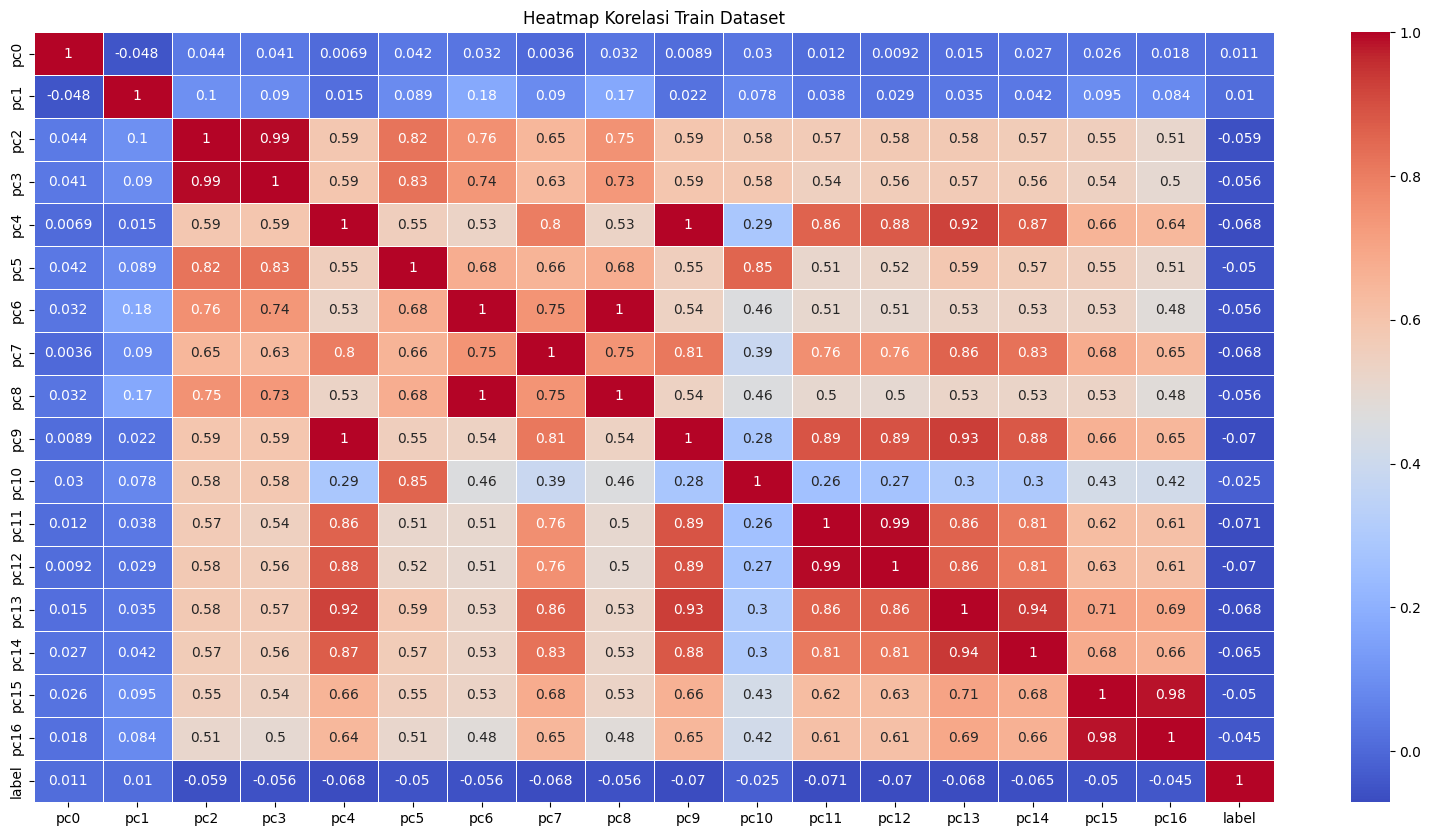

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(except_id_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Train Dataset")
plt.show()

In [ ]:
# Mengambil 100 data berlabel 0
data_label_0 = df.loc[df['label'] == 0].head(100)

# Mengambil 100 data berlabel 1
data_label_1 = df.loc[df['label'] == 1].head(100)

df1 = pd.concat([data_label_0, data_label_1])

In [ ]:
rowData = df.loc[:99, :]

<Axes: xlabel='pc6', ylabel='pc8'>

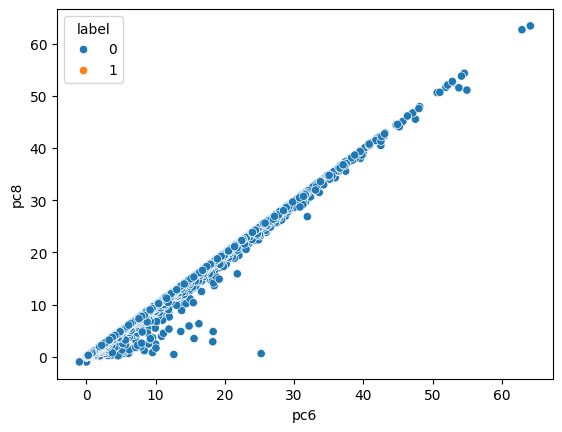

In [ ]:
  sns.scatterplot(data = df, x='pc6', y='pc8', hue = 'label')

<Axes: xlabel='pc4', ylabel='pc13'>

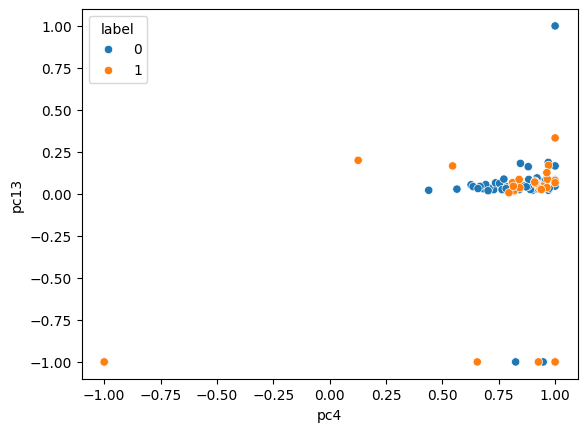

In [ ]:
  sns.scatterplot(data = df1, x='pc4', y='pc13', hue = 'label')

In [ ]:
# Correctly dropping columns without using inplace=True
df2 = df.drop(columns=['user_id', 'pc6', 'pc9'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recalculating VIF after removing highly correlated features
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)


   feature         VIF
0      pc0    3.561868
1      pc1    4.332284
2      pc2  112.245982
3      pc3  111.123404
4      pc4    7.516247
5      pc5   16.149890
6      pc7    8.525653
7      pc8    4.608744
8     pc10    8.218828
9     pc11  109.910865
10    pc12  127.650290
11    pc13   22.274031
12    pc14    7.624302
13    pc15   64.459287
14    pc16   44.357325
15   label    1.019621


In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df_train = df2.drop(columns=['label'])

In [ ]:
X = df_train
y = df2['label']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Apply Random Undersampling to reduce the majority class
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)


In [ ]:
# Splitting undersampled data into training and testing sets
from sklearn.model_selection import train_test_split

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

# Standardizing the data (recommended for regularization techniques)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_us)
X_test_scaled = scaler.transform(X_test_us)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

# Define a range of polynomial degrees to test
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize lists to store results
mean_scores = []
best_degree = None
best_score = -1

for degree in degrees:
    # Initialize PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=False)

    # Fit and transform the features
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Initialize StandardScaler and fit_transform
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)

    # Train a model (e.g., Logistic Regression) on the polynomial features
    model = LogisticRegression(max_iter=2000)  # Increase max_iter as needed

    # Perform cross-validation to evaluate model performance
    scores = cross_val_score(model, X_train_poly_scaled, y_train_us, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    mean_scores.append(mean_score)

    # Track the best degree and score
    if mean_score > best_score:
        best_score = mean_score
        best_degree = degree

# Print mean scores for each degree
for degree, score in zip(degrees, mean_scores):
    print(f"Degree {degree}: Mean Accuracy = {score:.4f}")

# After finding the best degree, fit the final model and evaluate on test set
best_poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_best_poly = best_poly.fit_transform(X_train_scaled)
X_test_best_poly = best_poly.transform(X_test_scaled)

scaler = StandardScaler()
X_train_best_poly_scaled = scaler.fit_transform(X_train_best_poly)
X_test_best_poly_scaled = scaler.transform(X_test_best_poly)

final_model = LogisticRegression(max_iter=2000)
final_model.fit(X_train_best_poly_scaled, y_train_us)
y_pred = final_model.predict(X_test_best_poly_scaled)

print("Best Degree:", best_degree)
print("Classification Report:\n", classification_report(y_test_us, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test_us, final_model.predict_proba(X_test_best_poly_scaled)[:, 1])}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [ ]:
# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Get feature names after transformation
poly_feature_names = poly.get_feature_names(input_features=X.columns)


In [ ]:
# Initialize Logistic Regression
logreg = LogisticRegression()

# Fit the model on the polynomial features
logreg.fit(X_train_poly, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test_poly)
y_pred_proba = logreg.predict_proba(X_test_poly)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}")


In [ ]:
count0 = 0
count1 = 0
for i in df['label']:
  if i == 0:
    count0 += 1
  else :
    count1 += 1
print(count0)
print(count1)

847042
10857


In [ ]:
#

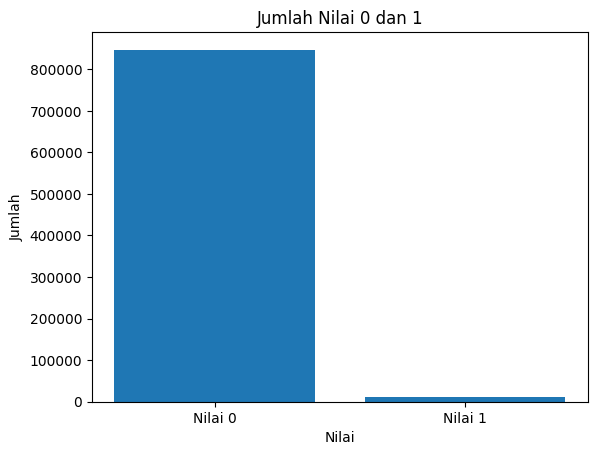

In [ ]:
import matplotlib.pyplot as plt

# Data untuk diagram batang
labels = ['Nilai 0', 'Nilai 1']
values = [count0, count1]

# Membuat diagram batang
plt.bar(labels, values)
plt.xlabel('Nilai')
plt.ylabel('Jumlah')
plt.title('Jumlah Nilai 0 dan 1')
plt.show()


,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc11,pc12,pc13,pc14,pc15,pc16,label,reference_contact,loan_type,ts
0,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0,2191460,5,759
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0,176154,10,116
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0,1611064,4,350
3,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0,609079,4,153
4,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0,3574121,5,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471085,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,...,0.102339,0.010133,0.068404,0.857143,0.011696,0.190476,0,516168,5,113
1471086,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,...,0.102339,0.010133,0.068404,0.857143,0.011696,0.190476,0,3572146,6,394
1471087,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,...,0.048499,0.012201,0.058252,0.458333,0.004619,0.083333,0,2918415,3,117
1471088,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,...,0.245783,0.031592,0.060703,0.736842,0.009639,0.210526,0,766955,6,393


# Non Borrower

In [ ]:
loan_activities = pd.read_csv('/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/loan_activities.csv')
loan_activities.head()

,user_id,reference_contact,loan_type,ts
0,2223129,903716,1,671
1,1380939,484583,1,89
2,2724411,1185034,1,230
3,2401751,1369254,1,120
4,1982168,21797,1,57


In [ ]:
#unsupervised
non_borrower = pd.read_csv('/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/non_borrower_user.csv')
non_borrower.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,0,1,5,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
1,1,0,8,0.63,0.565,0.896825,0.6,2.298,0.21,2.284,0.993908,1,0.103175,0.006092,0.053097,1.0,0.007937,0.166667
2,2,-1,-1,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
3,6,0,1,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
4,7,1,6,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000


In [ ]:
non_borrower.shape[0]

1048575

In [ ]:
loan_activities = pd.read_csv('/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/loan_activities.csv')
loan_activities.head()

,user_id,reference_contact,loan_type,ts
0,2223129,903716,1,671
1,1380939,484583,1,89
2,2724411,1185034,1,230
3,2401751,1369254,1,120
4,1982168,21797,1,57


In [ ]:
loan_activities.duplicated().sum()

0

# Test

In [ ]:
test_df = pd.read_csv('/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/test.csv')
test_df.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,0.993614,2.0,0.056180,0.006386,0.095238,0.750000,0.022472,0.250000
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,0.862896,1.0,0.357143,0.137104,0.027778,0.500000,0.002976,0.166667
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,0.672941,1.0,0.418605,0.327059,0.051429,0.333333,0.003322,0.111111
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,0.752409,2.0,0.513575,0.247591,0.046512,0.800000,0.004525,0.200000


In [ ]:
test_df

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,0.993614,2.0,0.056180,0.006386,0.095238,0.750000,0.022472,0.250000
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,0.862896,1.0,0.357143,0.137104,0.027778,0.500000,0.002976,0.166667
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,0.672941,1.0,0.418605,0.327059,0.051429,0.333333,0.003322,0.111111
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,0.752409,2.0,0.513575,0.247591,0.046512,0.800000,0.004525,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367697,3700510,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
367698,3700517,0.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
367699,3700526,0.0,1.0,0.220,0.195,0.886364,0.1,0.074,0.002,0.066,0.891892,0.0,0.113636,0.108108,0.025641,-1.000000,-1.000000,-1.000000
367700,3700539,1.0,4.0,2.440,2.295,0.940574,1.8,5.874,0.248,5.640,0.960163,7.0,0.059426,0.039837,0.039216,0.777778,0.014344,0.388889


In [ ]:
test1 = test[(test['pc10'] == -1) & (test['pc5'] ==  1)]
test1

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16


# 7 JULI PERCOBAAN 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import classification_report, average_precision_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Separate features and target
X = df.drop(columns=['user_id', 'label'])
y = df['label']

In [ ]:
# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implementing undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X_train, y_train)

In [ ]:
# Model 1: Logistic regression without handling multicollinearity
logreg_no_mc = LogisticRegression(penalty='none', solver='lbfgs', random_state=42, max_iter=10000)
logreg_no_mc.fit(X_balanced, y_balanced)

# Evaluate the model without handling multicollinearity
y_pred_no_mc = logreg_no_mc.predict(X_test)
avg_precision_no_mc = average_precision_score(y_test, y_pred_no_mc, average='macro')
print("Average Precision (No Handling for Multicollinearity):", avg_precision_no_mc)
print(classification_report(y_test, y_pred_no_mc))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Average Precision (No Handling for Multicollinearity): 0.02018075833234969
              precision    recall  f1-score   support

           0       1.00      0.54      0.70    169404
           1       0.02      0.80      0.04      2176

    accuracy                           0.55    171580
   macro avg       0.51      0.67      0.37    171580
weighted avg       0.98      0.55      0.70    171580



In [ ]:
print(X_balanced.shape)
print(y_balanced.shape)

(17362, 17)
(17362,)


In [ ]:
# Model 2: Logistic Regression with Ridge regularization to handle multicollinearity
logreg_ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, max_iter=10000)
logreg_ridge.fit(X_balanced, y_balanced)

# Evaluate the model with Ridge regularization
y_pred_ridge = logreg_ridge.predict(X_test)
avg_precision_ridge = average_precision_score(y_test, y_pred_ridge, average='macro')
print("Average Precision (With Ridge Regularization):", avg_precision_ridge)
print(classification_report(y_test, y_pred_ridge))


Average Precision (With Ridge Regularization): 0.02026854268321615
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    169404
           1       0.02      0.80      0.04      2176

    accuracy                           0.55    171580
   macro avg       0.51      0.67      0.38    171580
weighted avg       0.98      0.55      0.70    171580



In [ ]:
# Optional: Implementing SVRS with multiple resampling for better handling multicollinearity
n_iterations = 10  # Number of resampling iterations
coefs = []

for i in range(n_iterations):
    X_train_resampled, y_train_resampled = resample(X_train[y_train == 0], y_train[y_train == 0],
                                                    n_samples=np.sum(y_train == 1), random_state=i)
    X_resampled = np.vstack((X_train_resampled, X_train[y_train == 1]))
    y_resampled = np.hstack((y_train_resampled, y_train[y_train == 1]))
    logreg_ridge.fit(X_resampled, y_resampled)
    coefs.append(logreg_ridge.coef_)

# Average the coefficients
avg_coefs = np.mean(coefs, axis=0)

# Fit the final model using the average coefficients
final_logreg = LogisticRegression(penalty='none', random_state=42)
final_logreg.coef_ = avg_coefs
final_logreg.intercept_ = logreg_ridge.intercept_
final_logreg.classes_ = logreg_ridge.classes_  # Manually set the classes_

# Evaluate the final model
y_pred_final = final_logreg.predict(X_test)
avg_precision_final = average_precision_score(y_test, y_pred_final, average='macro')
print("Average Precision (Final Model with SVRS):", avg_precision_final)
print(classification_report(y_test, y_pred_final))

Average Precision (Final Model with SVRS): 0.020181904662465545
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    169404
           1       0.02      0.79      0.04      2176

    accuracy                           0.56    171580
   macro avg       0.51      0.67      0.38    171580
weighted avg       0.98      0.56      0.70    171580



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(penalty='l2', random_state=42, max_iter=10000), param_grid, cv=5, scoring='average_precision', n_jobs=-1)
grid_search.fit(X_smote, y_smote)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
avg_precision_best = average_precision_score(y_test, y_pred_best, average='macro')
print("Average Precision (Best Model with SMOTE and Hyperparameter Tuning):", avg_precision_best)
print(classification_report(y_test, y_pred_best))
